### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-12/12/19
#### Clasificacion de alfa de los canales C3 y C4 de MI-EEG con CNN-1D + LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 2, 255))
x_test = x_test.reshape((n_samples_test, 1, 2, 255))

print(x_train.shape)
print(x_test.shape)

(288, 1, 2, 255)
(288, 1, 2, 255)


In [11]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 255, 2)
(288, 1, 255, 2)


Iteration: 1
288/288 [==============================] - 0s 133us/sample - loss: 2.4955 - acc: 0.3646
kappa:  0.1527777777777778
confusion matrix:
 [[27 22 10 13]
 [32 27  8  5]
 [16  8 23 25]
 [17  4 23 28]]
(0.37246060221808397, 0.3645833333333333, 0.36628175400073765, None)


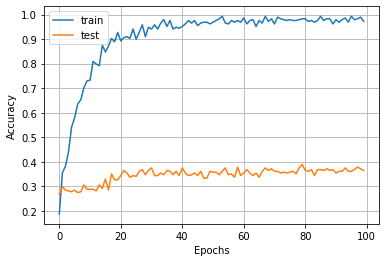

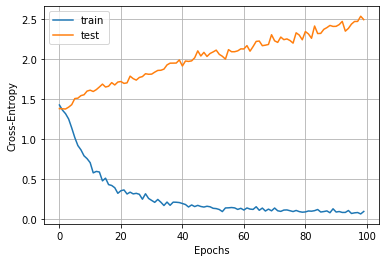

Iteration: 2
288/288 [==============================] - 0s 87us/sample - loss: 2.9242 - acc: 0.3299
kappa:  0.10648148148148151
confusion matrix:
 [[18 14 26 14]
 [24 17 21 10]
 [15  6 33 18]
 [15  3 27 27]]
(0.3436788906948395, 0.3298611111111111, 0.32631630894364166, None)


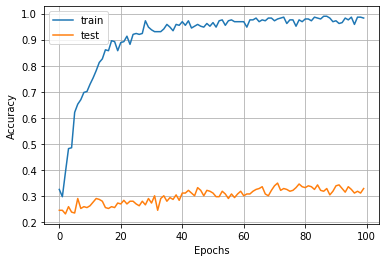

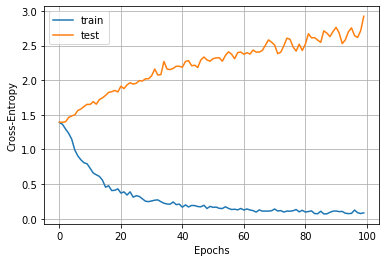

Iteration: 3
288/288 [==============================] - 0s 87us/sample - loss: 2.2085 - acc: 0.4062
kappa:  0.20833333333333337
confusion matrix:
 [[24 30  7 11]
 [30 33  7  2]
 [10  5 25 32]
 [10  6 21 35]]
(0.40610923423423423, 0.40625, 0.40503402809639294, None)


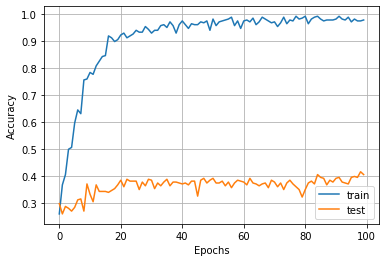

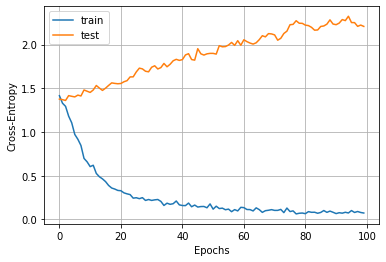

Iteration: 4
288/288 [==============================] - 0s 116us/sample - loss: 2.5547 - acc: 0.3368
kappa:  0.1157407407407407
confusion matrix:
 [[13 27 17 15]
 [22 28 12 10]
 [ 9  6 29 28]
 [ 6 10 29 27]]
(0.3312998826291079, 0.3368055555555556, 0.3311915444538314, None)


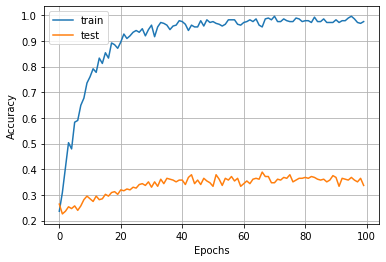

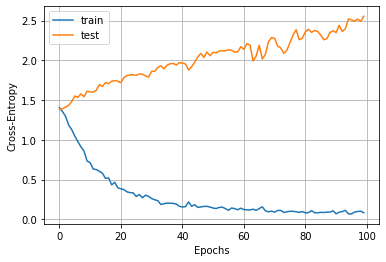

Iteration: 5
288/288 [==============================] - 0s 87us/sample - loss: 2.1954 - acc: 0.4062
kappa:  0.20833333333333337
confusion matrix:
 [[27 26  8 11]
 [30 29  7  6]
 [14  4 26 28]
 [12  3 22 35]]
(0.4108103882503902, 0.40625, 0.4067336046610937, None)


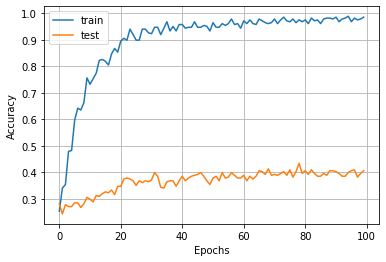

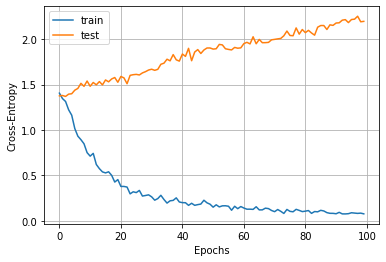

Iteration: 6
288/288 [==============================] - 0s 88us/sample - loss: 2.3797 - acc: 0.3715
kappa:  0.1620370370370371
confusion matrix:
 [[23 30  3 16]
 [30 31  7  4]
 [ 9  8 19 36]
 [13  8 17 34]]
(0.37502133132567916, 0.3715277777777778, 0.3677048843358002, None)


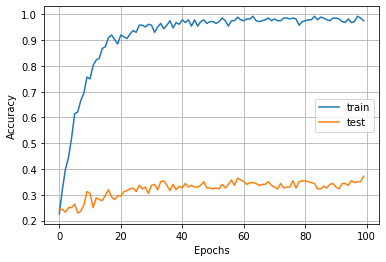

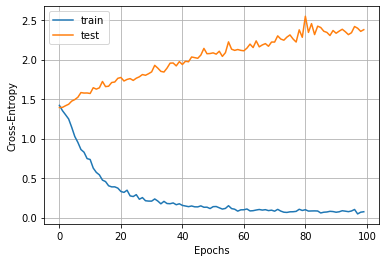

Iteration: 7
288/288 [==============================] - 0s 92us/sample - loss: 2.5370 - acc: 0.3646
kappa:  0.1527777777777778
confusion matrix:
 [[18 22 18 14]
 [20 22 15 15]
 [12  5 27 28]
 [11  3 20 38]]
(0.36391472257250945, 0.36458333333333337, 0.35896709491519024, None)


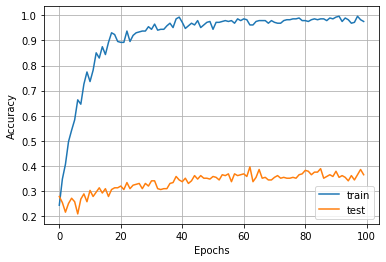

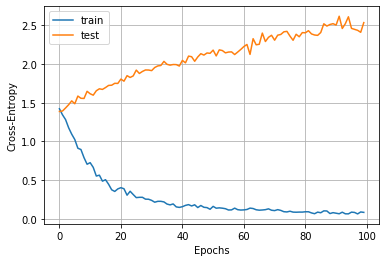

Iteration: 8
288/288 [==============================] - 0s 89us/sample - loss: 2.4394 - acc: 0.3993
kappa:  0.19907407407407407
confusion matrix:
 [[17 16 19 20]
 [19 29 13 11]
 [ 7  4 31 30]
 [ 6  4 24 38]]
(0.40856720243745065, 0.3993055555555556, 0.39484332172496833, None)


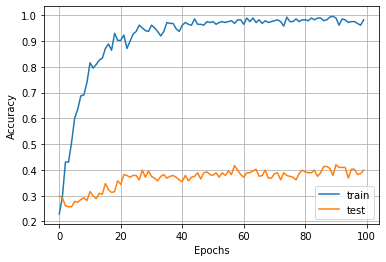

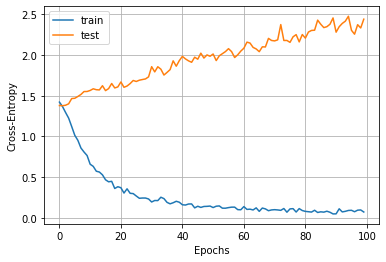

Iteration: 9
288/288 [==============================] - 0s 93us/sample - loss: 2.6333 - acc: 0.3368
kappa:  0.1157407407407407
confusion matrix:
 [[13 25 24 10]
 [17 35 13  7]
 [10 18 30 14]
 [16 12 25 19]]
(0.3317796756383713, 0.3368055555555555, 0.32813820845118746, None)


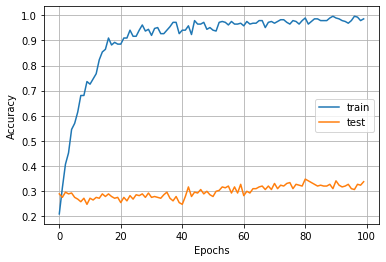

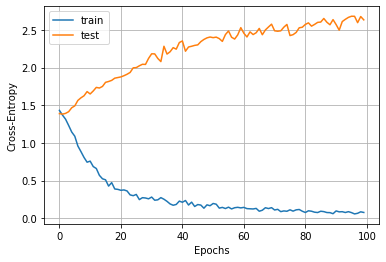

Iteration: 10
288/288 [==============================] - 0s 95us/sample - loss: 2.4059 - acc: 0.3785
kappa:  0.17129629629629628
confusion matrix:
 [[27 29  5 11]
 [34 28  6  4]
 [22  6 22 22]
 [16  4 20 32]]
(0.3923750440132843, 0.3784722222222222, 0.38114197018644885, None)


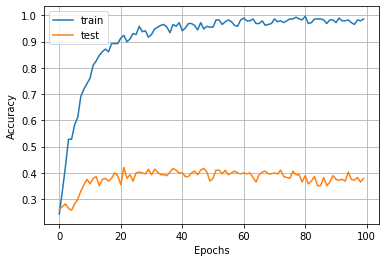

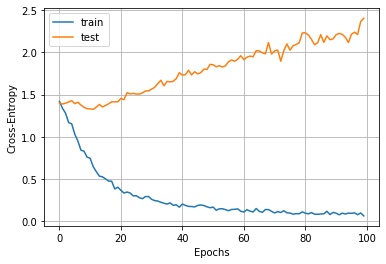


Resultados:
loss: [2.4955045647091336, 2.924195475048489, 2.208523975478278, 2.554713911480374, 2.1953819725248547, 2.3796522749794855, 2.536963595284356, 2.4393786324395075, 2.6332750850253634, 2.405914651023017]
accuracy: [0.36458334, 0.3298611, 0.40625, 0.33680555, 0.40625, 0.3715278, 0.36458334, 0.39930555, 0.33680555, 0.3784722]
kappa: [0.1527777777777778, 0.10648148148148151, 0.20833333333333337, 0.1157407407407407, 0.20833333333333337, 0.1620370370370371, 0.1527777777777778, 0.19907407407407407, 0.1157407407407407, 0.17129629629629628]
precision: [0.37246060221808397, 0.3436788906948395, 0.40610923423423423, 0.3312998826291079, 0.4108103882503902, 0.37502133132567916, 0.36391472257250945, 0.40856720243745065, 0.3317796756383713, 0.3923750440132843]
recall: [0.3645833333333333, 0.3298611111111111, 0.40625, 0.3368055555555556, 0.40625, 0.3715277777777778, 0.36458333333333337, 0.3993055555555556, 0.3368055555555555, 0.3784722222222222]
f1: [0.36628175400073765, 0.32631630894364166

In [18]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(16, 64, activation='relu'), input_shape=(None,255,2)))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(16))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [19]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_58 (TimeDis (None, None, 192, 16)     2064      
_________________________________________________________________
dropout_58 (Dropout)         (None, None, 192, 16)     0         
_________________________________________________________________
time_distributed_59 (TimeDis (None, None, 3072)        0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 16)                197696    
_________________________________________________________________
dropout_59 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 68        
Total params: 199,828
Trainable params: 199,828
Non-trainable params: 0
_______________________________________________

In [20]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.3694
std: (+/- 0.0273)
kappa: 0.1593
precision: 0.3736
recall: 0.3694
f1: 0.3666
